fullImagePerspectiveTransforms: {'./test_images/straight_lines1.jpg': array([[ -5.31513375e-01,  -1.51949207e+00,   9.86150355e+02],
       [ -3.99680289e-15,  -1.85192138e+00,   8.56944796e+02],
       [ -6.93889390e-18,  -2.35980489e-03,   1.00000000e+00]]), './test_images/straight_lines2.jpg': array([[ -5.44565668e-01,  -1.50812703e+00,   9.78774441e+02],
       [ -3.55271368e-15,  -1.87266770e+00,   8.61938220e+02],
       [ -6.50521303e-18,  -2.37991628e-03,   1.00000000e+00]])} , fullImagePerspectiveTransforms.keys: dict_keys(['./test_images/straight_lines1.jpg', './test_images/straight_lines2.jpg'])
fullImageInverseTransforms: {'./test_images/straight_lines1.jpg': array([[  1.73013823e-01,  -8.20494982e-01,   5.32501243e+02],
       [  1.22124533e-15,  -5.39979734e-01,   4.62732819e+02],
       [  2.81892565e-18,  -1.27424681e-03,   1.00000000e+00]]), './test_images/straight_lines2.jpg': array([[  1.75205780e-01,  -8.05336297e-01,   5.22663257e+02],
       [ -1.11022302e-16,  -5

testProcessImage-videoFrameName:  ./test_images/video_frames/frame0002.jpg , visualizationImage.shape: (720, 1180, 3) , type: uint8
binaryImageNames: ['./test_images/binary/test1.png', './test_images/binary/test2.png', './test_images/binary/test3.png', './test_images/binary/test4.png', './test_images/binary/test5.png', './test_images/binary/test6.png']
testImageNames: ['./test_images/transformed/test1.jpg', './test_images/transformed/test2.jpg', './test_images/transformed/test3.jpg', './test_images/transformed/test4.jpg', './test_images/transformed/test5.jpg', './test_images/transformed/test6.jpg']
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (720, 1280) , type: uint8
locateLaneMarkerIndex - binaryImage.shape: (720, 1280) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogra

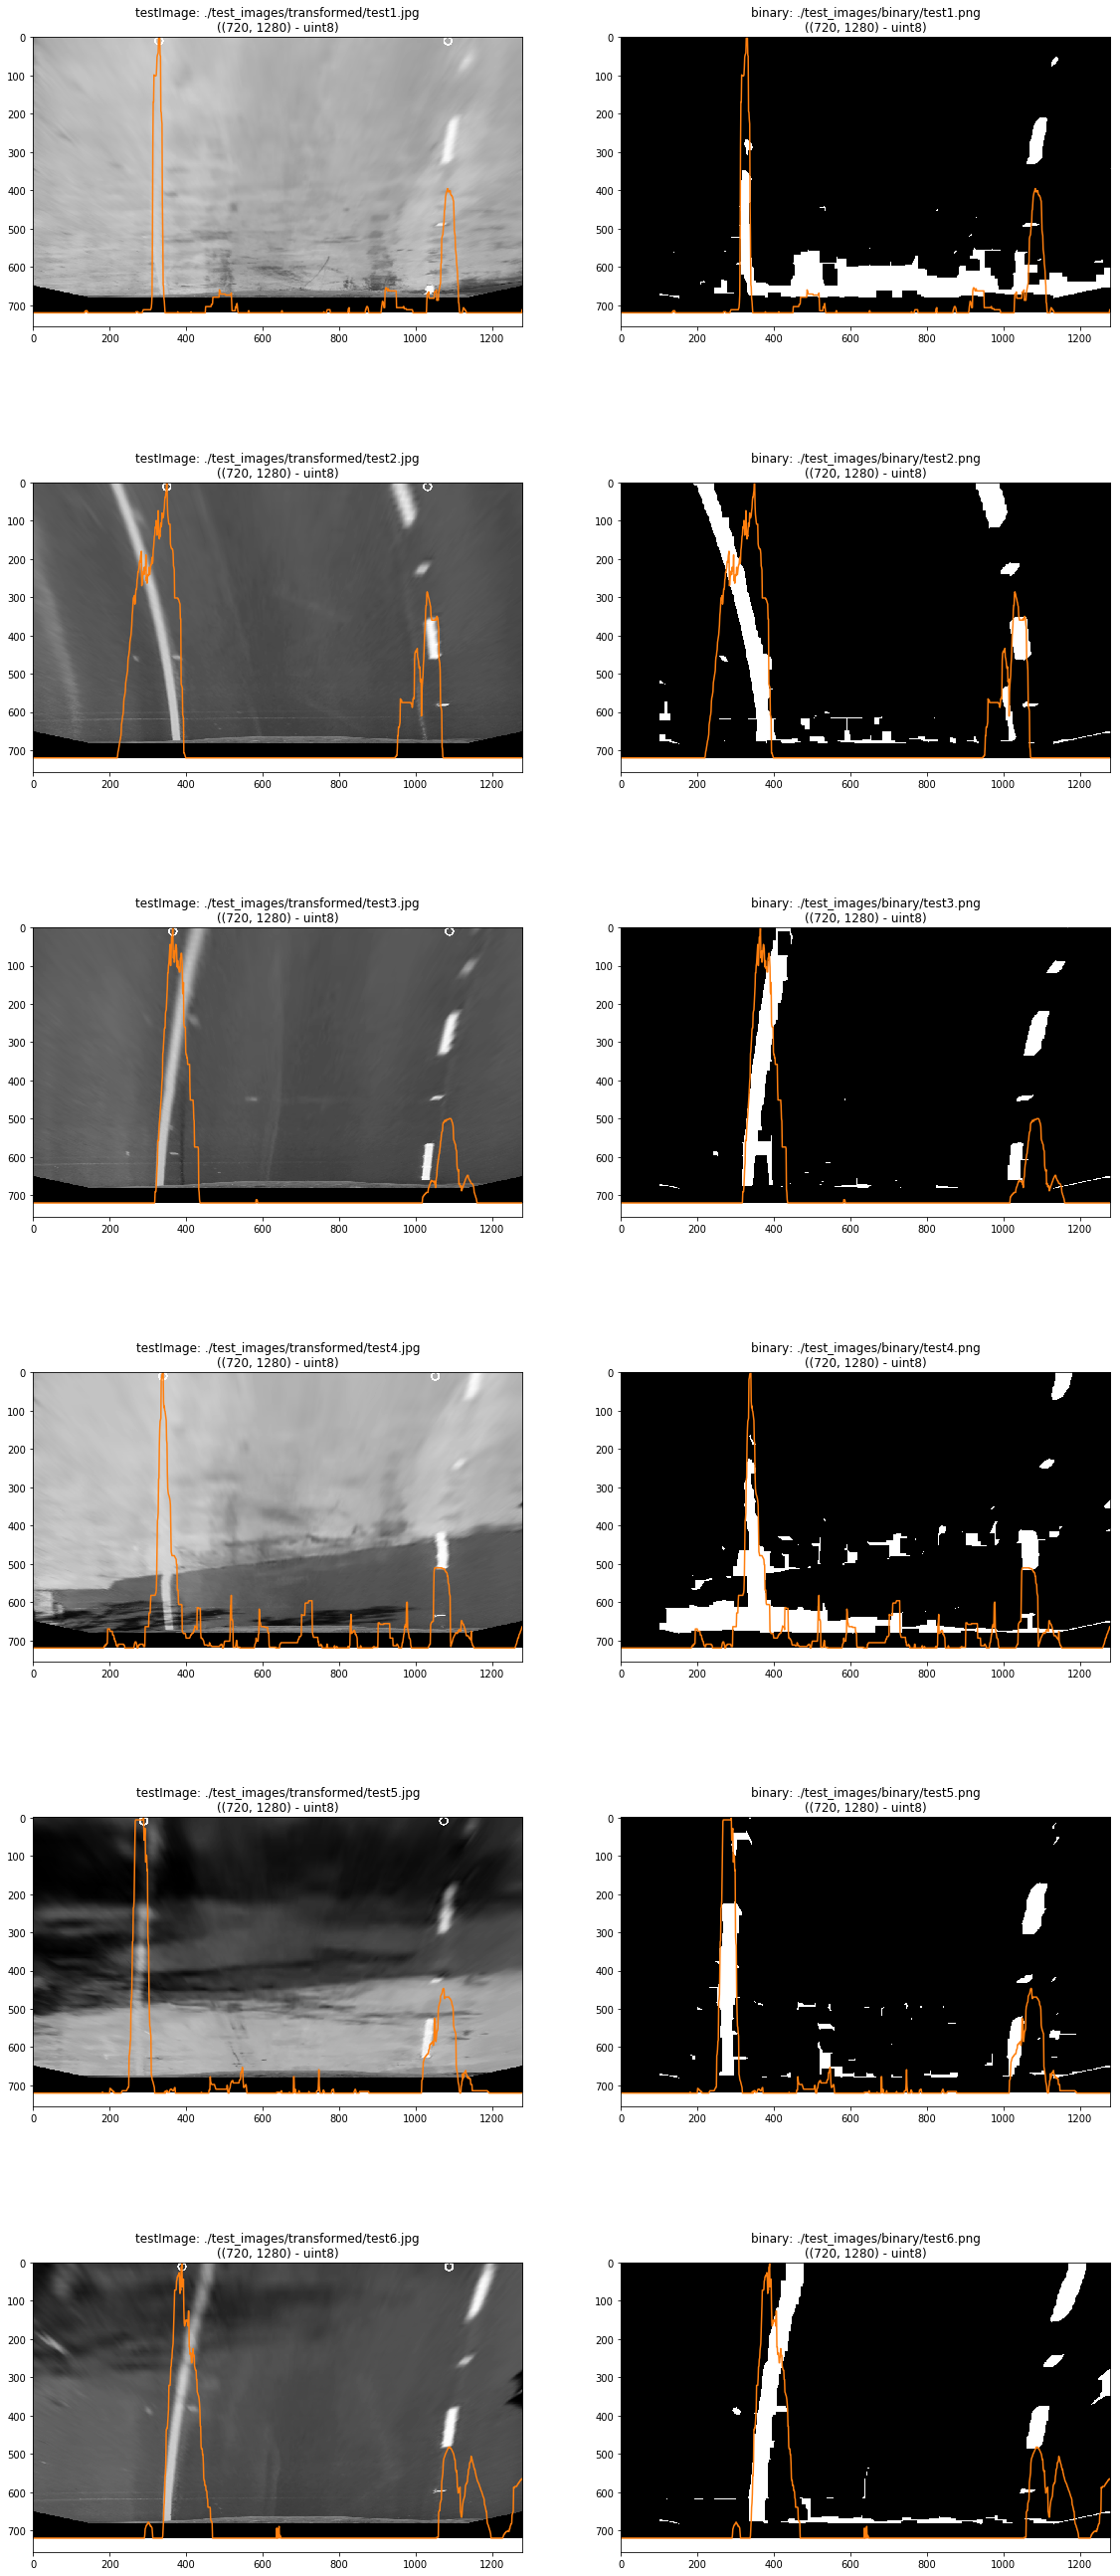

In [1]:
import glob
import numpy as np
import ProcessImage
import AnnotateImage

binaryImageNames=glob.glob("./test_images/binary/test*")
binaryImageNames.sort()
#binaryImageNames= [
#    './test_images/binary/test1.png',
#    './test_images/binary/test2.png',
#    './test_images/binary/test3.png',
#    './test_images/binary/test4.png',
#    './test_images/binary/test5.png',
#    './test_images/binary/test6.png'
#]
print("binaryImageNames:", binaryImageNames)
testImageNames=glob.glob("./test_images/transformed/test*")
testImageNames.sort()
#testImageNames= [
#    './test_images/transformed/test1.jpg',
#   './test_images/transformed/test2.jpg',
#    './test_images/transformed/test3.jpg',
#    './test_images/transformed/test4.jpg',
#    './test_images/transformed/test5.jpg',
#    './test_images/transformed/test6.jpg'
#]
print("testImageNames:", testImageNames)

binaryImageColumnCount=3 # original, transformed
totalImageRows=len(binaryImageNames) # 1 row per image

#import matplotlib.image as mpimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
showBinaryImages = plt.figure(figsize = (binaryImageColumnCount*10,totalImageRows*8))

binaryImages={}
histograms={}

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    binaryImage=cv2.imread(binaryImageName, flags=0) # flags=0 is grayscale
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    binaryImages[binaryImageName]=binaryImage

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+2)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    [leftx_base, rightx_base], histogram=ProcessImage.locateLaneMarkerIndex(binaryImage)
    histograms[binaryImageName]=histogram
    print("binaryImageName: ",binaryImageName, ", histogram.shape:", histogram.shape, ", histogram[0]:", histogram[0])
    print("leftx_base:", leftx_base, ", histogram[leftx_base]", histogram[leftx_base], ", rightx_base:", rightx_base, ", histogram[rightx_base]:",histogram[rightx_base])
    invertedHistogram=AnnotateImage.invertHistogram(histogram, binaryImage.shape[0])
    p.plot(invertedHistogram, color='C1')
    
    testImage=cv2.imread(testImageName, flags=0) # flags=0 is grayscale
    cv2.circle(testImage, (leftx_base,10), 10, (255,255,0), 3)
    cv2.circle(testImage, (rightx_base,10), 10, (255,255,0), 3)
    #croppedTestImage=testImage[startingInRow:,:]
    #print("locateLaneMarkerIndex - testImageName: ",testImageName, ", croppedTestImage.shape:", croppedTestImage.shape, ", type:", croppedTestImage.dtype)
    #croppedTestImages[testImageName]=croppedTestImage
    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+1)
    p.set_title("testImage: "+testImageName+"\n("+str(testImage.shape)+" - "+str(testImage.dtype)+")")
    p.imshow(testImage, cmap='gray')
    p.plot(invertedHistogram, color='C1')
    

testImage.shape: (720, 1280, 3) , type: uint8
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (720, 1280) , type: uint8
binaryImage counts: (array([0, 1], dtype=uint8), array([850299,  71301])) , shape: (720, 1280)
initializeSlidingWindows - binaryImage.shape: (720, 1280) , type: uint8
total pixels: 921600 , whiteX: 71301 , whiteY: 71301
locateLaneMarkerIndex - binaryImage.shape: (720, 1280) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogram.shape: (1280,) , type: uint64
locateLaneMarkerIndex - leftx_base: 329 , rightx_base: 1083
initializeSlidingWindows-leftx_base: 329 , rightx_base: 1083
total pixels: 921600 , whiteX: 71301 , whiteY: 71301
initializeSlidingWindows-nwindows:  9 , window_height: 80
initializeSlidingWindows-binaryImage.shape: (720, 1280) , type: uint8
initia

initializeSlidingWindows - binaryImage.shape: (720, 1280) , type: uint8
total pixels: 921600 , whiteX: 55054 , whiteY: 55054
locateLaneMarkerIndex - binaryImage.shape: (720, 1280) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogram.shape: (1280,) , type: uint64
locateLaneMarkerIndex - leftx_base: 389 , rightx_base: 1086
initializeSlidingWindows-leftx_base: 389 , rightx_base: 1086
total pixels: 921600 , whiteX: 55054 , whiteY: 55054
initializeSlidingWindows-nwindows:  9 , window_height: 80
initializeSlidingWindows-binaryImage.shape: (720, 1280) , type: uint8
initializeSlidingWindows-visualizationImage.shape: (720, 1280, 3) , type: uint8
window:  0 , window.shape: ( 289 , 489 ),( 986 , 1186 ) x ( 640 , 720 )
window:  1 , window.shape: ( 282 , 482 ),( 990 , 1190 ) x ( 560 , 640 )
window:  2 , window

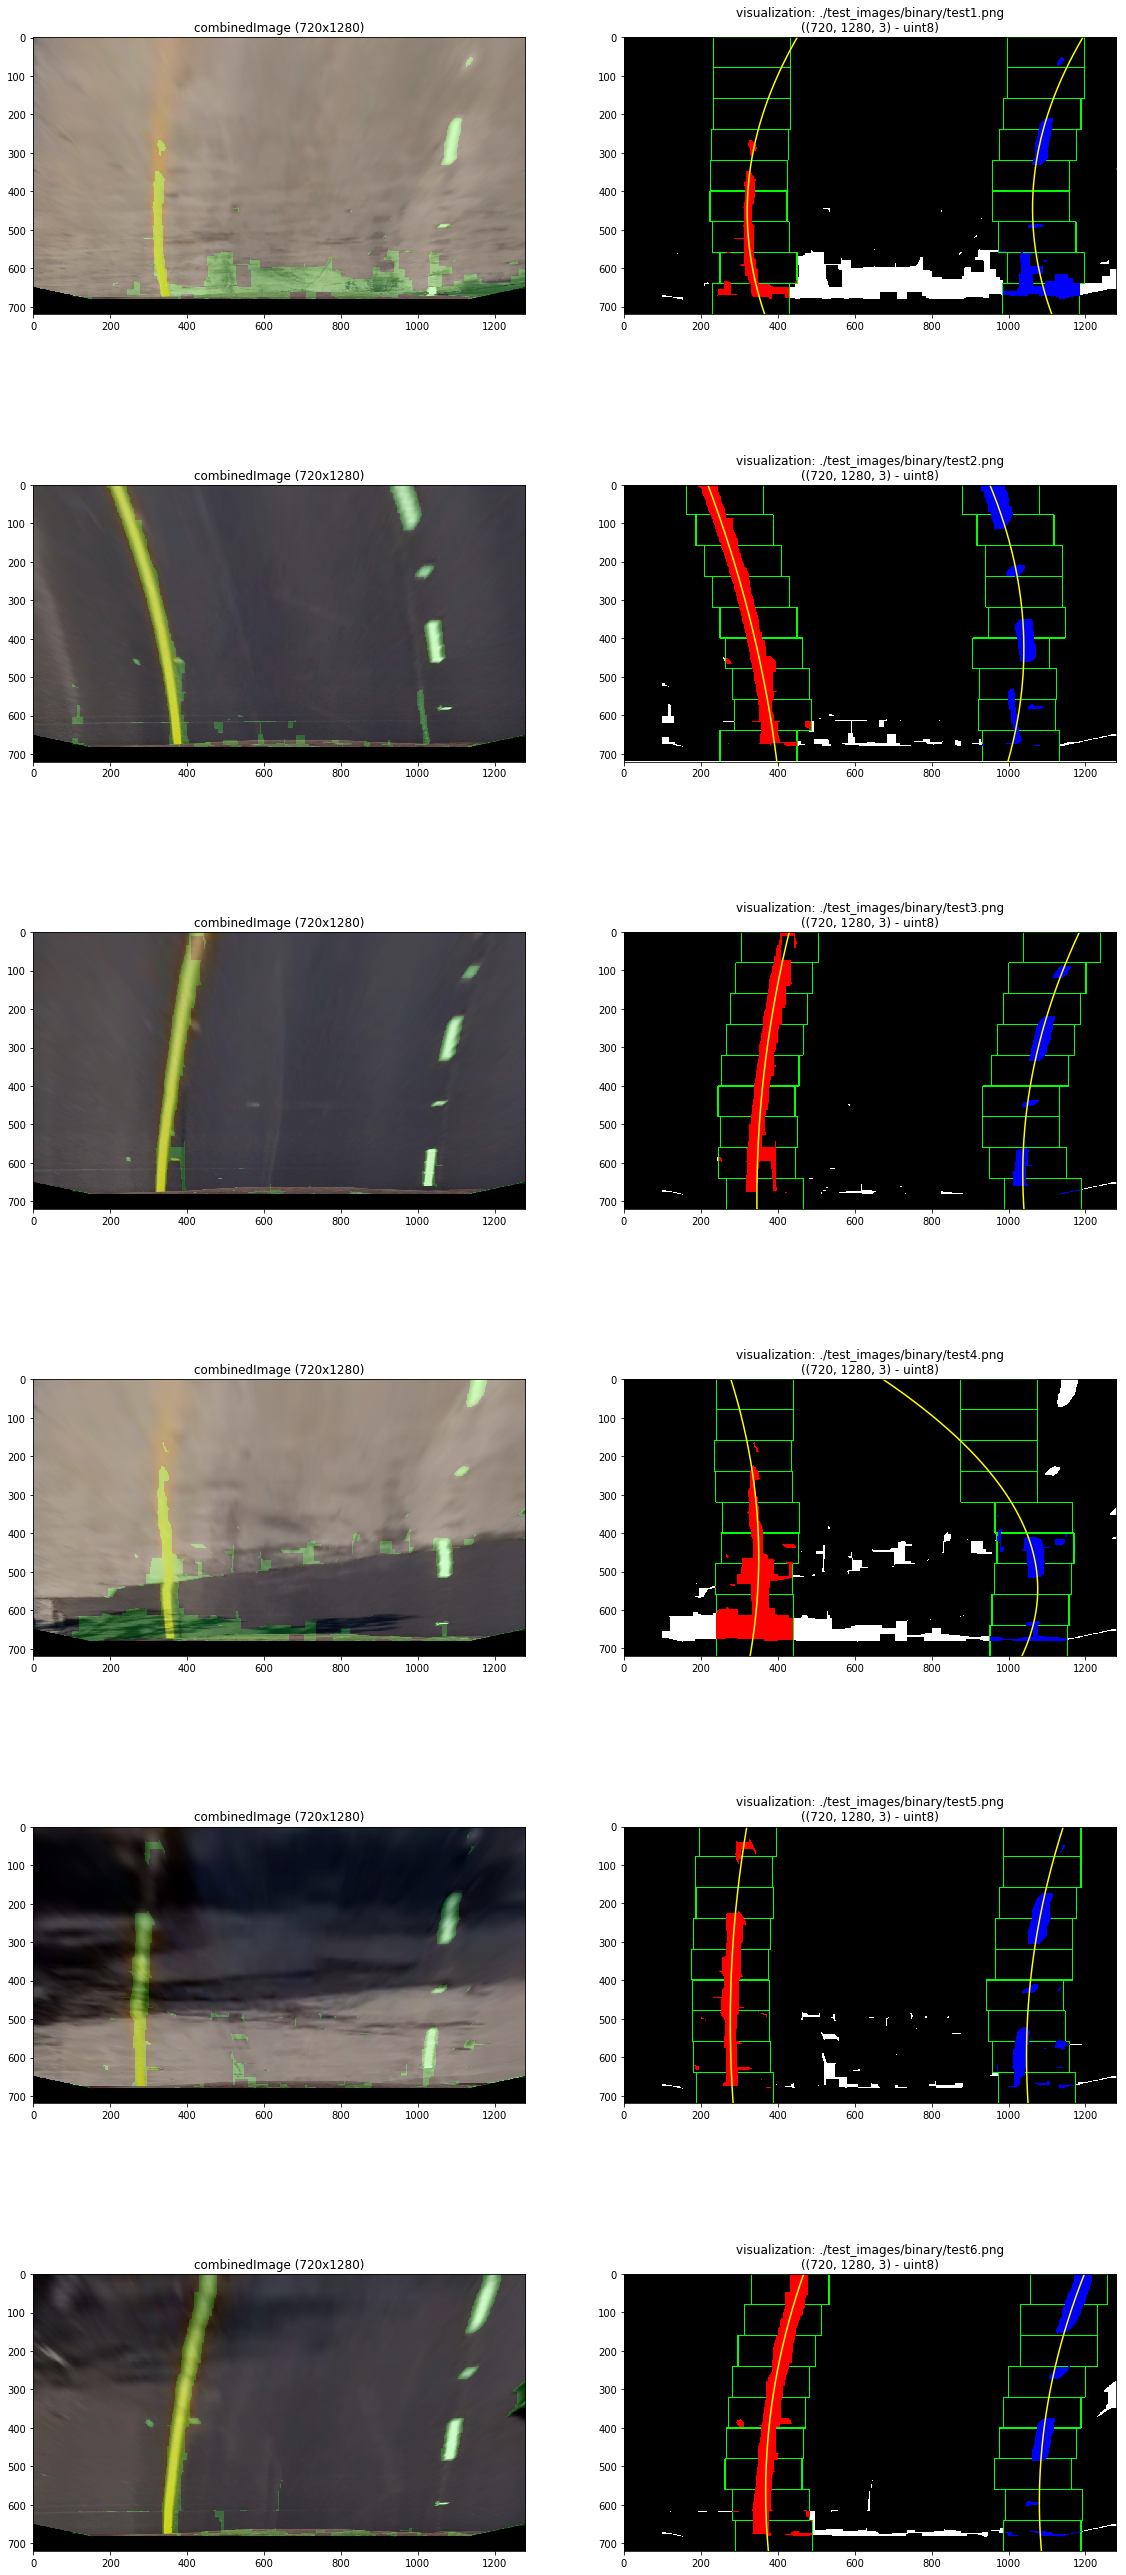

In [2]:
import matplotlib.image as mpimage
import AnnotateImage

laneVisualizationColumnCount=3 # original, transformed
totalLaneVisualizationRows=len(binaryImageNames) # 1 row per image

%matplotlib inline
showLaneVisualization= plt.figure(figsize = (laneVisualizationColumnCount*10,totalLaneVisualizationRows*8))

# cropping 100 pixels off the left and off the top
TRIMLEFT=0
TRIMTOP=100

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, laneVisualizationColumnCount*len(binaryImageNames), laneVisualizationColumnCount)):

    testImage=cv2.imread(testImageName) # bgr image
    testImage=cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB);
    print("testImage.shape:", testImage.shape, ", type:", testImage.dtype)
   
    
    binaryImage=binaryImages[binaryImageName] # 0/1
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    print("binaryImage counts:", np.unique(binaryImage, return_counts=True), ", shape:",binaryImage.shape)
    overlayImage=np.dstack((np.zeros_like(binaryImage), binaryImage, np.zeros_like(binaryImage)))*255 # rgb, with green only
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("overlayImage ("+str(overlayImage.shape[0])+"x"+str(overlayImage.shape[1])+")")
    p.imshow(overlayImage)
    combinedImage=AnnotateImage.combineImages(overlayImage, testImage, α=.8)
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+1)
    p.set_title("combinedImage ("+str(combinedImage.shape[0])+"x"+str(combinedImage.shape[1])+")")
    p.imshow(combinedImage)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    
    [left_fit, right_fit], visualizationImage = ProcessImage.initializeSlidingWindows(binaryImage)
    ploty = np.linspace(0, binaryImage.shape[0]-1, binaryImage.shape[0] ) #  y/row values
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("visualization: "+binaryImageName+"\n("+str(visualizationImage.shape)+" - "+str(visualizationImage.dtype)+")")
    p.imshow(visualizationImage)
    
    p.plot(left_fitx, ploty, color='yellow')
    p.plot(right_fitx, ploty, color='yellow')
    p.set_xlim([0, visualizationImage.shape[1]])
    p.set_ylim([visualizationImage.shape[0], 0])


videoImages: ['./test_images/video/video_frames/drivingFrame0001.jpg', './test_images/video/video_frames/drivingFrame0002.jpg', './test_images/video/video_frames/drivingFrame0003.jpg', './test_images/video/video_frames/drivingFrame0004.jpg', './test_images/video/video_frames/drivingFrame0005.jpg', './test_images/video/video_frames/drivingFrame0006.jpg', './test_images/video/video_frames/drivingFrame0007.jpg', './test_images/video/video_frames/drivingFrame0008.jpg', './test_images/video/video_frames/drivingFrame0009.jpg', './test_images/video/video_frames/drivingFrame0010.jpg', './test_images/video/video_frames/drivingFrame0011.jpg', './test_images/video/video_frames/drivingFrame0012.jpg', './test_images/video/video_frames/drivingFrame0013.jpg', './test_images/video/video_frames/drivingFrame0014.jpg', './test_images/video/video_frames/drivingFrame0015.jpg', './test_images/video/video_frames/drivingFrame0016.jpg', './test_images/video/video_frames/drivingFrame0017.jpg', './test_images/vi

calculateCarOffset-yAtBottom: 720 , xLeftAtBottom: 215.367581197 , xRightAtBottom: 590.102727001
calculateCarOffset-imageMidpointX: 590 , laneMidpoint: 402.367581197 , carOffset: -187.632418803
processVideoFrame-carOffset: -187.632418803


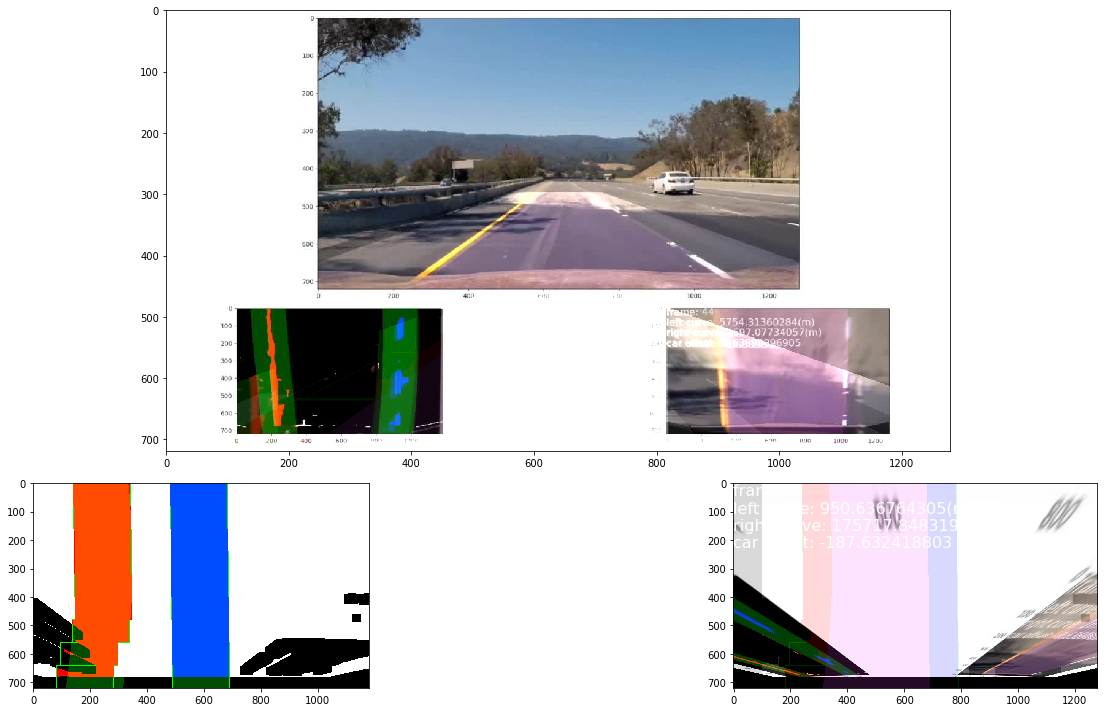

videoFrameName:  ./test_images/video/video_frames/drivingFrame0002.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  1 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([814509,  35091])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([846613,   2987])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([823841,  25759])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([113229, 736371])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849571,     29])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849571,     29])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([200290, 649310])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

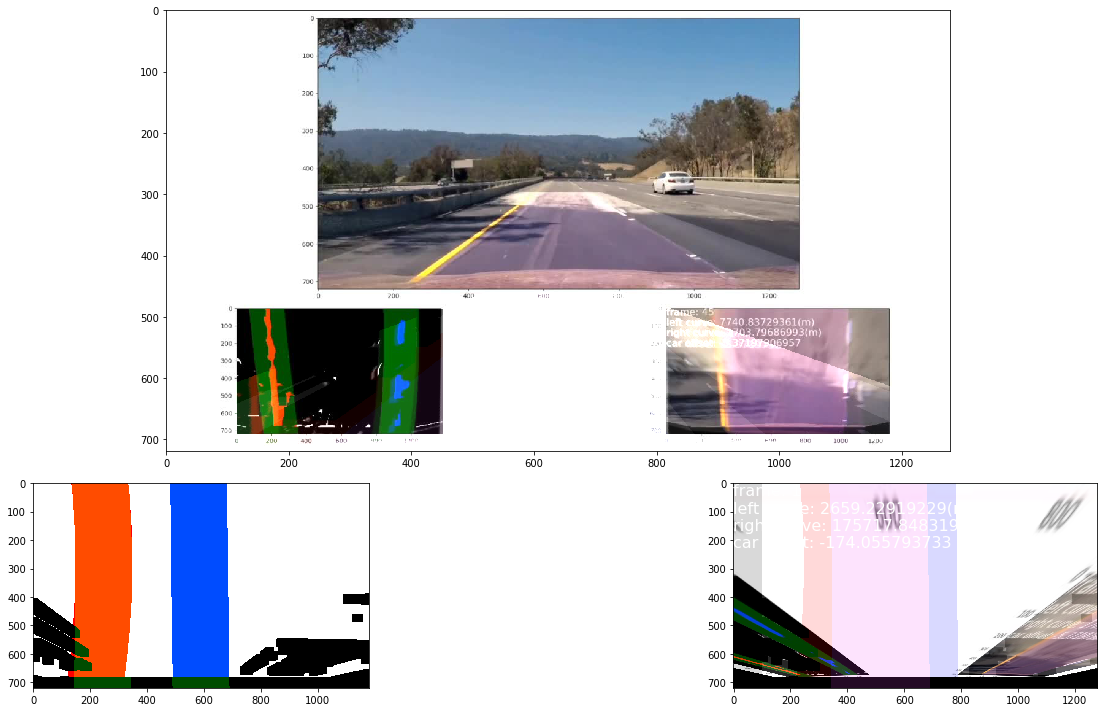

videoFrameName:  ./test_images/video/video_frames/drivingFrame0003.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  2 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([813818,  35782])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([837709,  11891])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([824096,  25504])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([111044, 738556])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849568,     32])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849568,     32])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199379, 650221])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

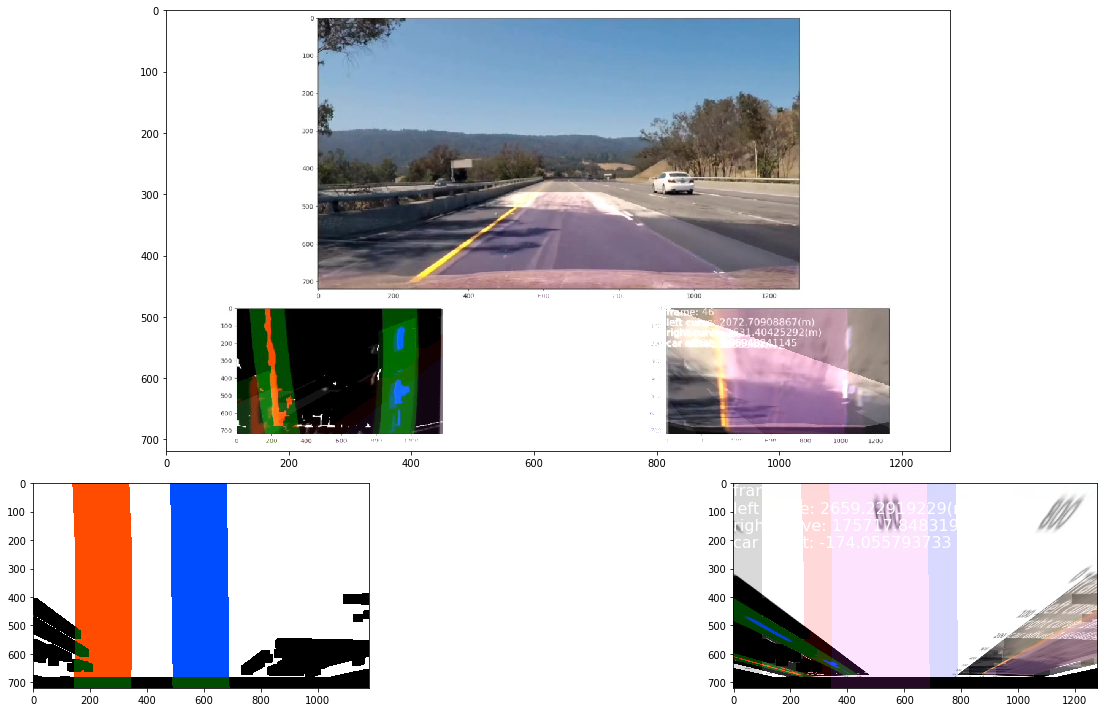

videoFrameName:  ./test_images/video/video_frames/drivingFrame0004.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  3 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([813981,  35619])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([843618,   5982])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([824239,  25361])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([108965, 740635])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849556,     44])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849556,     44])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199180, 650420])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

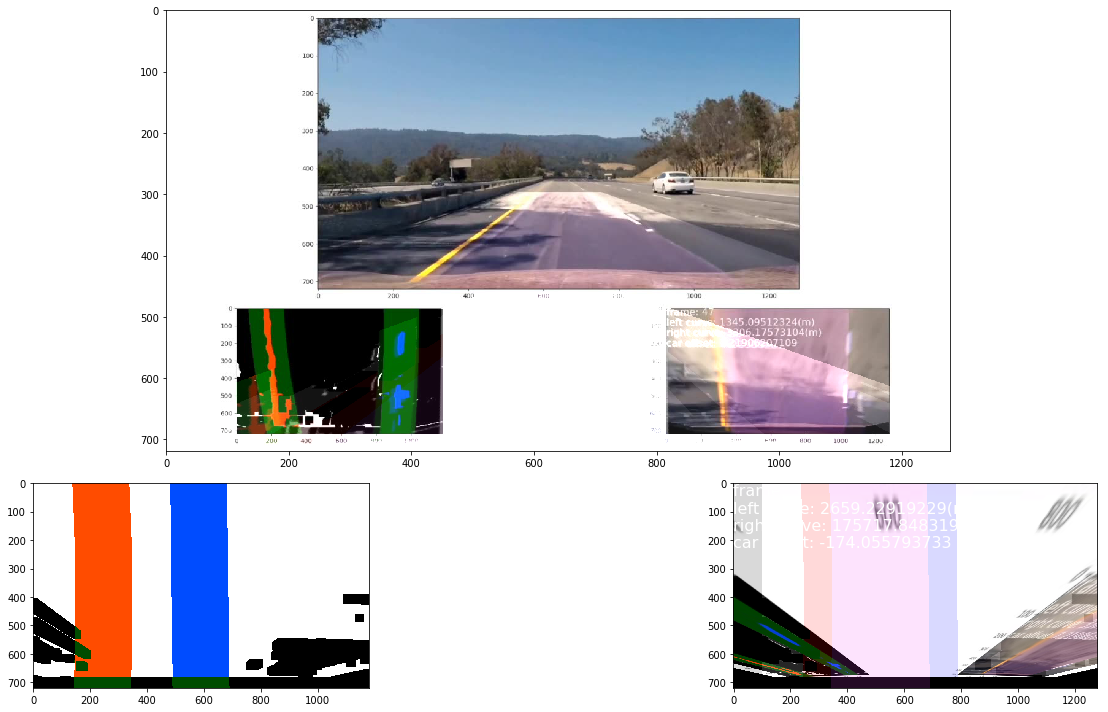

videoFrameName:  ./test_images/video/video_frames/drivingFrame0005.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  4 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([814599,  35001])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([845750,   3850])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([824857,  24743])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([107810, 741790])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849560,     40])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849560,     40])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199340, 650260])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

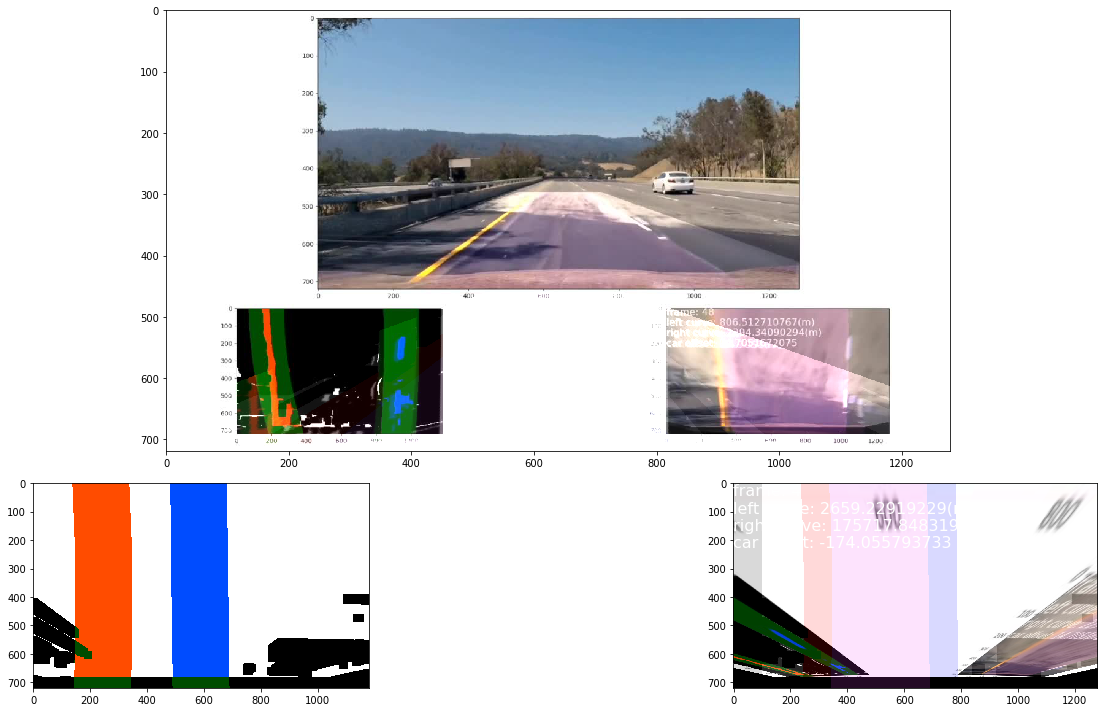

videoFrameName:  ./test_images/video/video_frames/drivingFrame0006.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  5 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([813744,  35856])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([845825,   3775])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([820960,  28640])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([106246, 743354])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849553,     47])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849553,     47])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199236, 650364])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

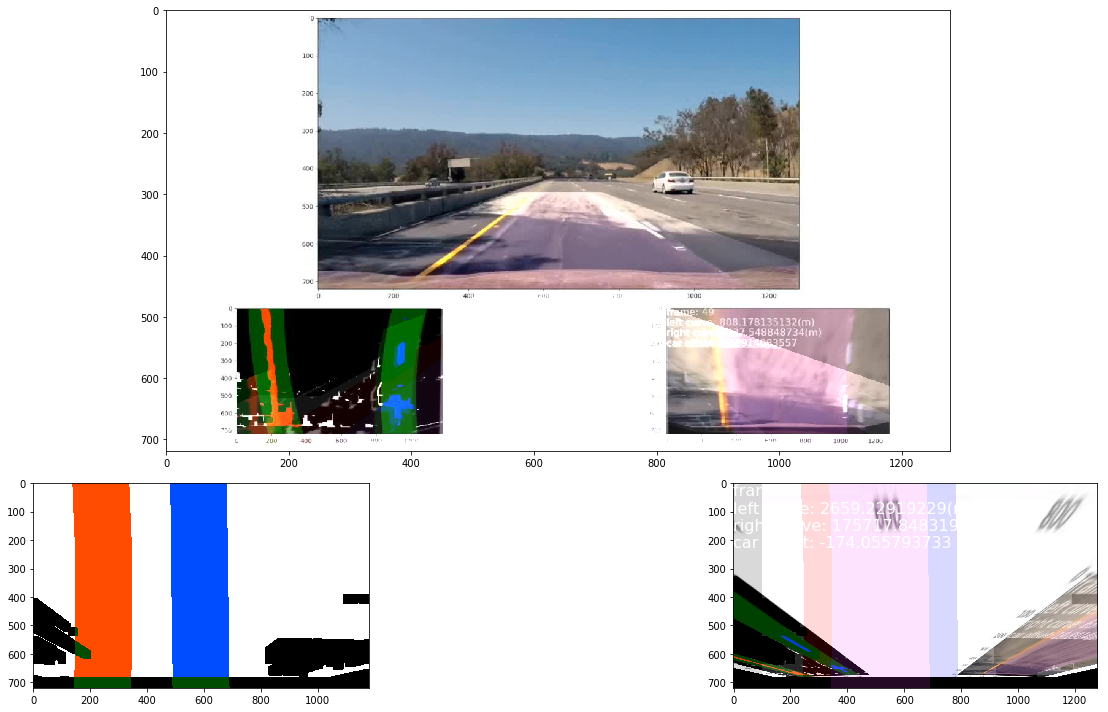

videoFrameName:  ./test_images/video/video_frames/drivingFrame0007.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  6 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([816326,  33274])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847994,   1606])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([819002,  30598])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([105799, 743801])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849564,     36])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849564,     36])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199597, 650003])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

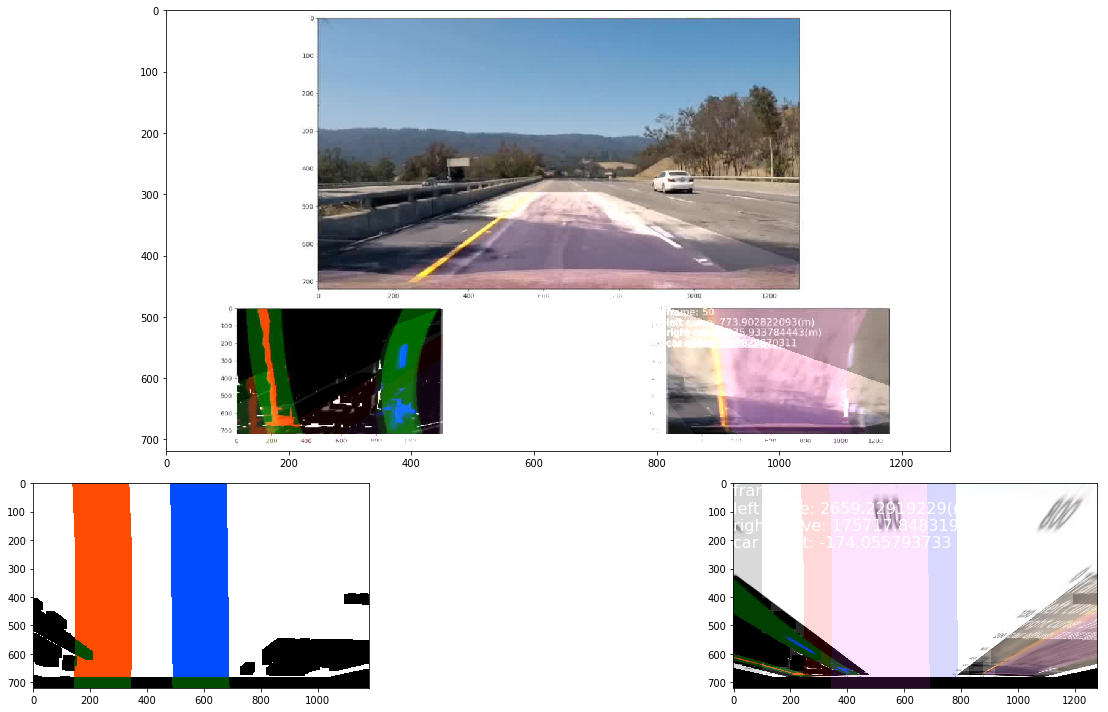

videoFrameName:  ./test_images/video/video_frames/drivingFrame0008.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  7 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818295,  31305])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([841199,   8401])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([815789,  33811])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([105751, 743849])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849575,     25])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849575,     25])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199793, 649807])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

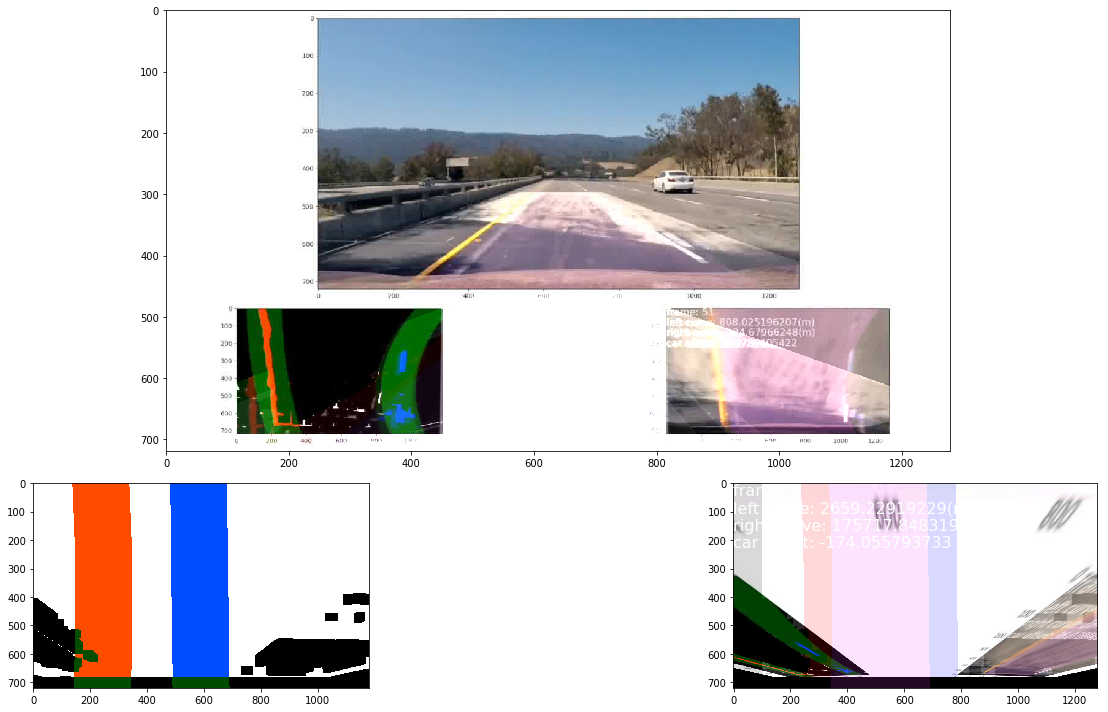

videoFrameName:  ./test_images/video/video_frames/drivingFrame0009.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  8 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817660,  31940])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([829577,  20023])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([816204,  33396])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([104516, 745084])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849566,     34])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849566,     34])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199282, 650318])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

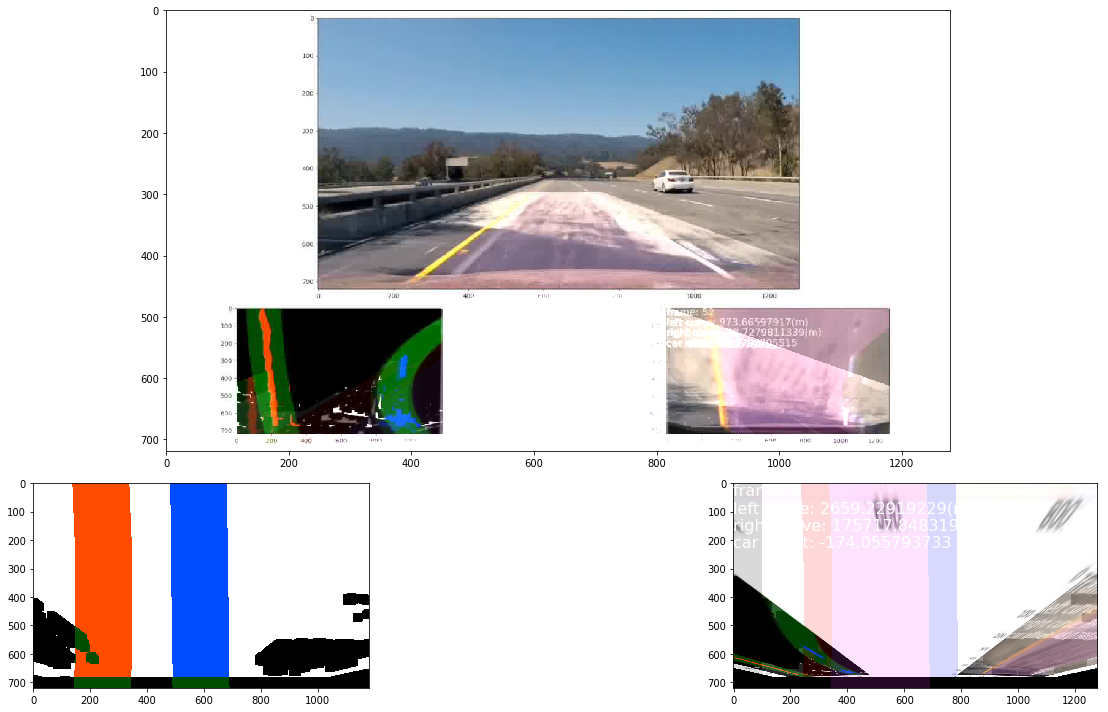

videoFrameName:  ./test_images/video/video_frames/drivingFrame0010.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  9 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817008,  32592])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([841645,   7955])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([827221,  22379])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([102070, 747530])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849545,     55])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849545,     55])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([198897, 650703])) , shape: (720, 1180)
enhanceLaneMarkers-combinedI

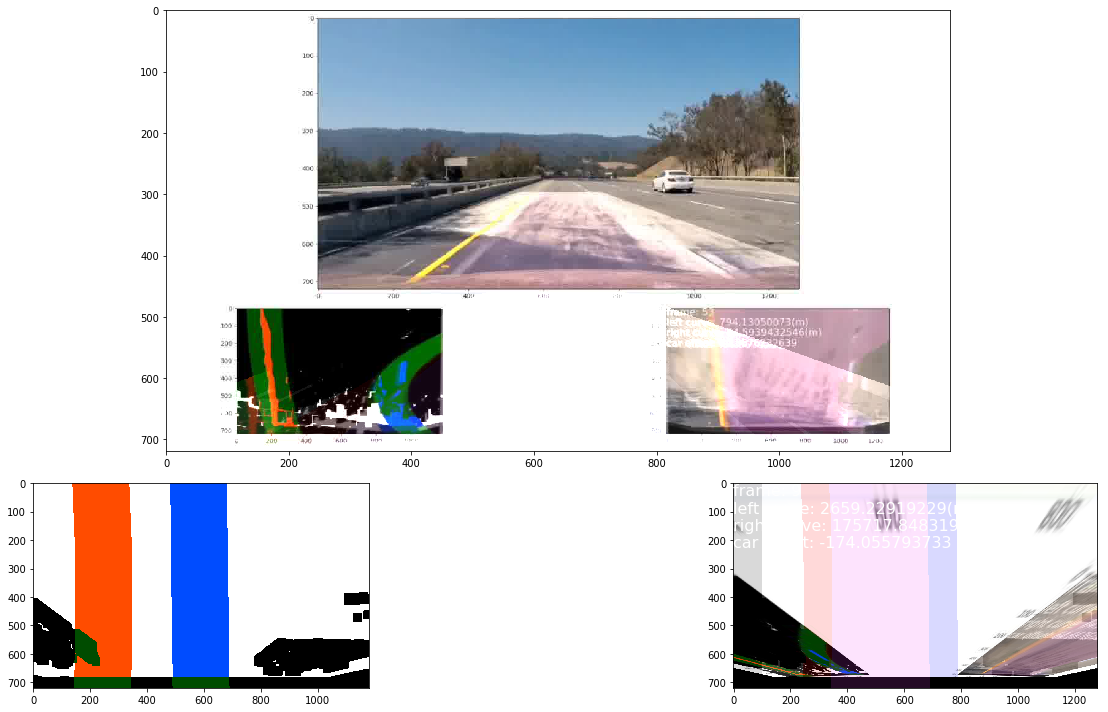

videoFrameName:  ./test_images/video/video_frames/drivingFrame0011.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  10 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818316,  31284])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([846615,   2985])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([831369,  18231])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([102376, 747224])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849549,     51])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849549,     51])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199584, 650016])) , shape: (720, 1180)
enhanceLaneMarkers-combined

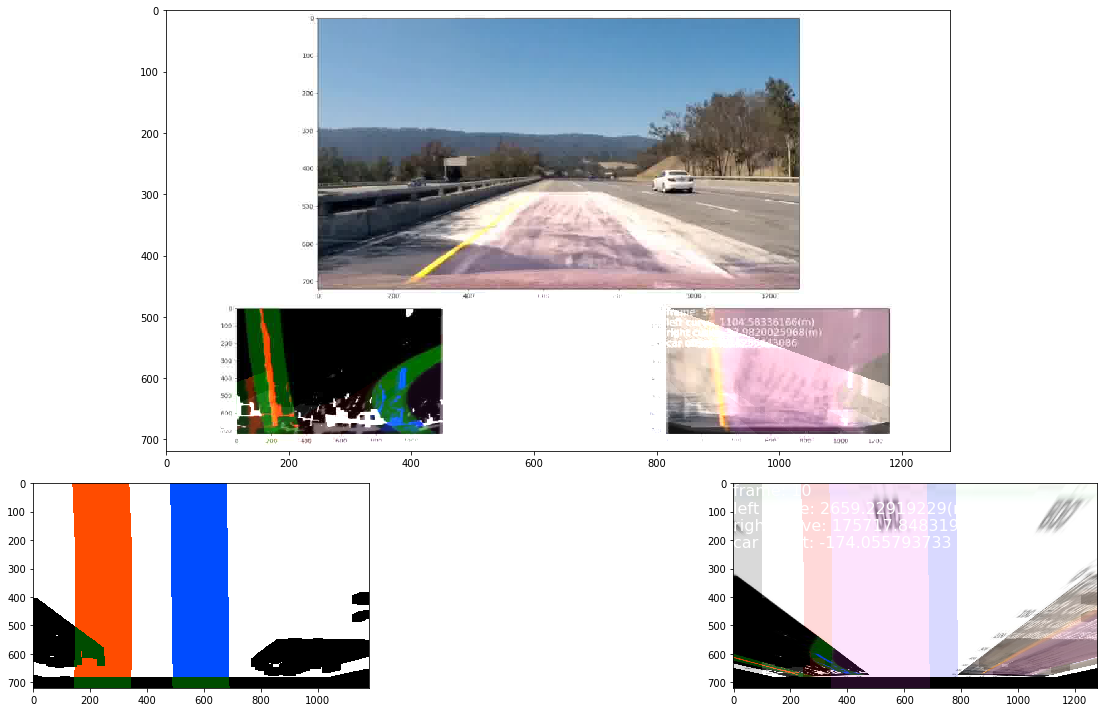

videoFrameName:  ./test_images/video/video_frames/drivingFrame0012.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  11 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818258,  31342])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([846588,   3012])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([834748,  14852])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([100450, 749150])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849552,     48])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849552,     48])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([198357, 651243])) , shape: (720, 1180)
enhanceLaneMarkers-combined

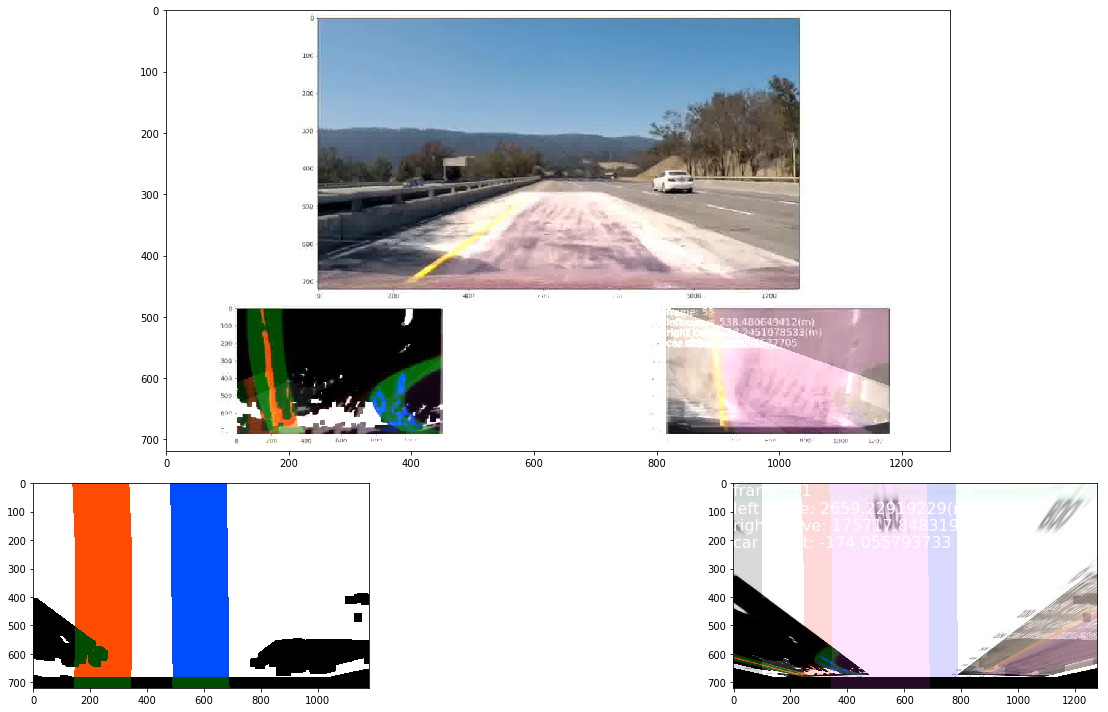

videoFrameName:  ./test_images/video/video_frames/drivingFrame0013.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  12 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817419,  32181])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([846209,   3391])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([837185,  12415])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 99992, 749608])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849554,     46])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849554,     46])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([198153, 651447])) , shape: (720, 1180)
enhanceLaneMarkers-combined

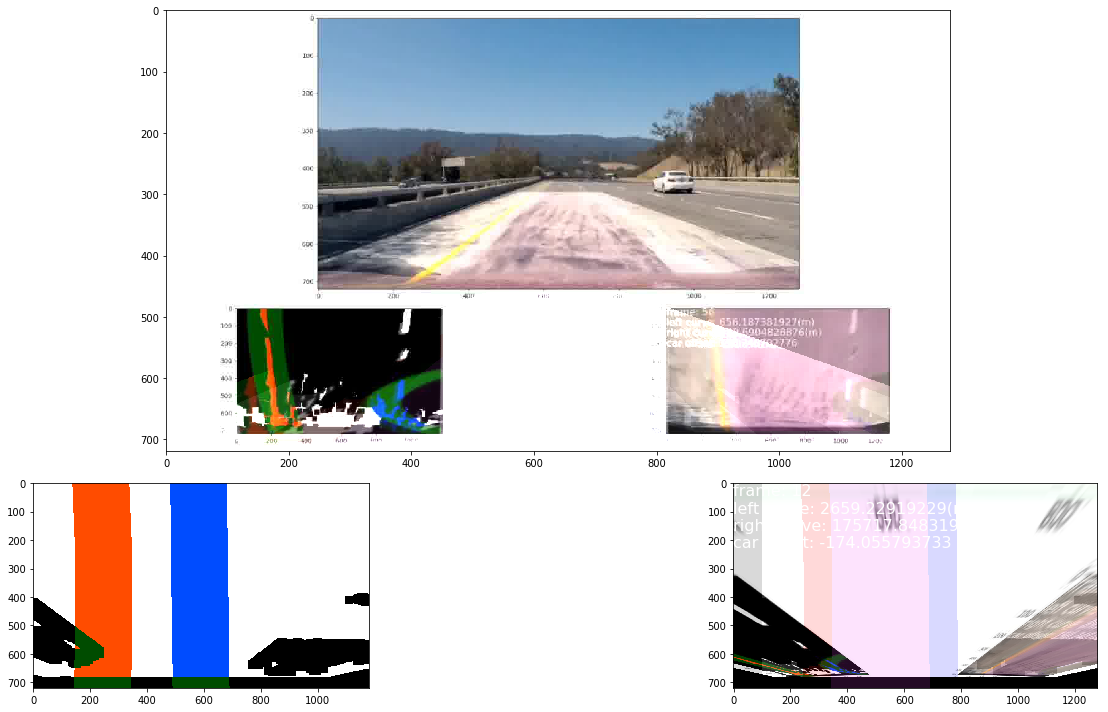

videoFrameName:  ./test_images/video/video_frames/drivingFrame0014.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  13 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817220,  32380])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848731,    869])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([838581,  11019])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 99212, 750388])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849536,     64])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849536,     64])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([197799, 651801])) , shape: (720, 1180)
enhanceLaneMarkers-combined

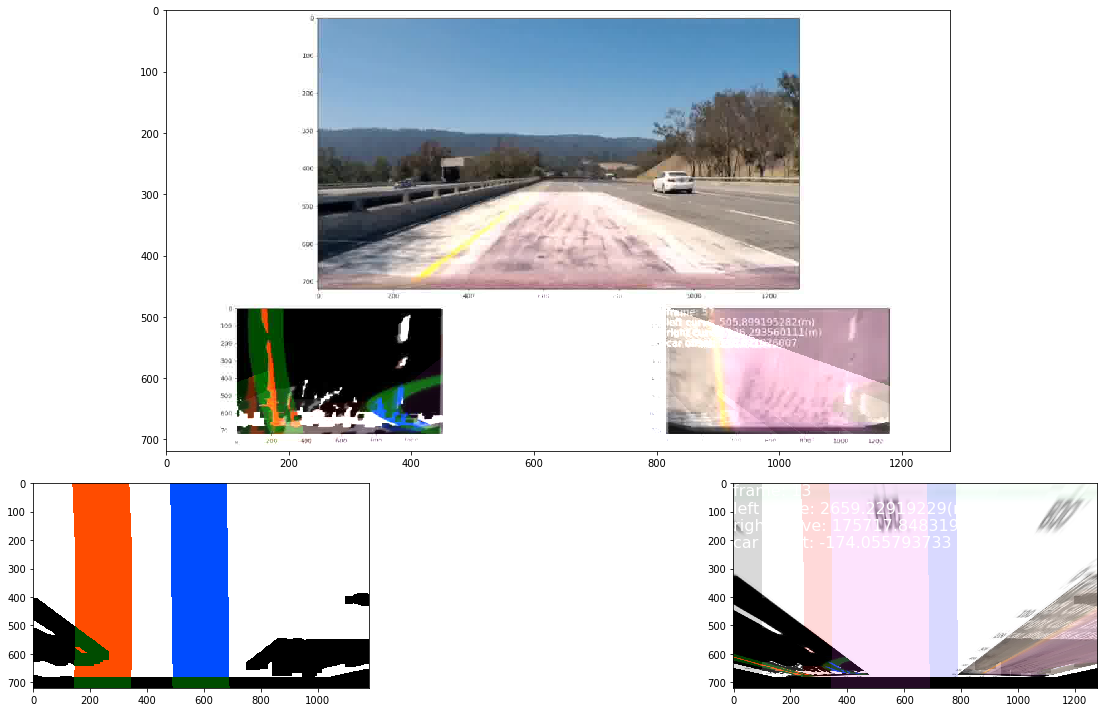

videoFrameName:  ./test_images/video/video_frames/drivingFrame0015.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  14 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([816787,  32813])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848237,   1363])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([839784,   9816])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 98717, 750883])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849525,     75])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849525,     75])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([197534, 652066])) , shape: (720, 1180)
enhanceLaneMarkers-combined

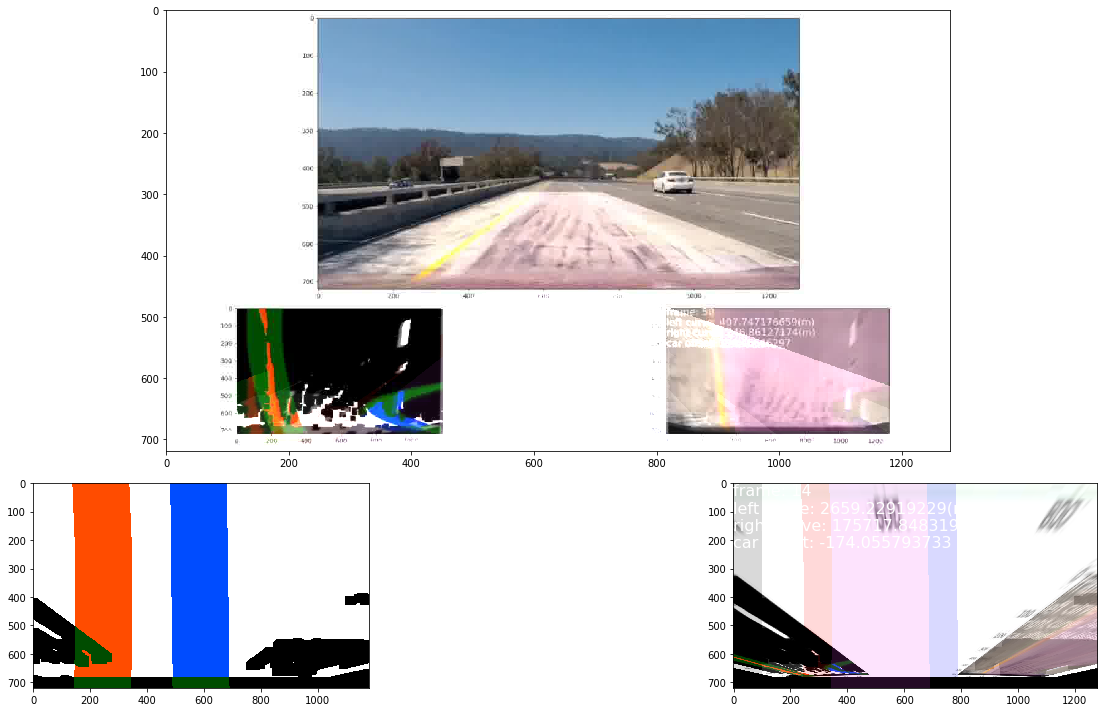

videoFrameName:  ./test_images/video/video_frames/drivingFrame0016.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  15 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817155,  32445])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848949,    651])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([840147,   9453])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 99118, 750482])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849550,     50])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849550,     50])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([197542, 652058])) , shape: (720, 1180)
enhanceLaneMarkers-combined

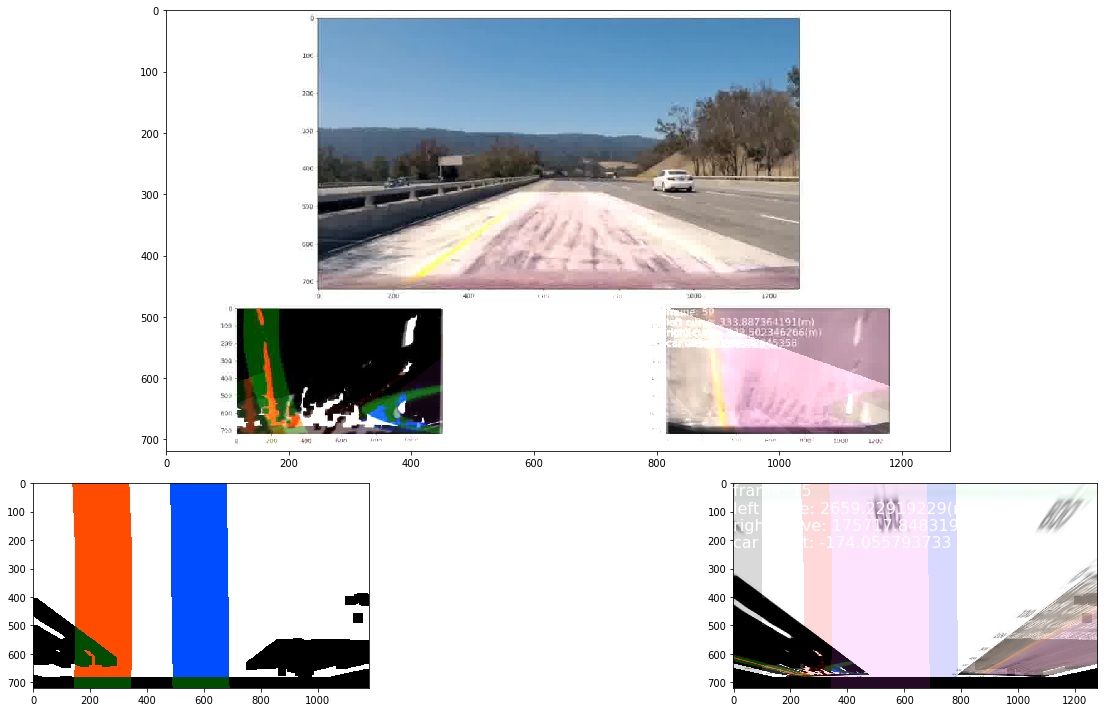

videoFrameName:  ./test_images/video/video_frames/drivingFrame0017.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  16 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([816705,  32895])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847624,   1976])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([839749,   9851])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 98328, 751272])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849561,     39])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849561,     39])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([196815, 652785])) , shape: (720, 1180)
enhanceLaneMarkers-combined

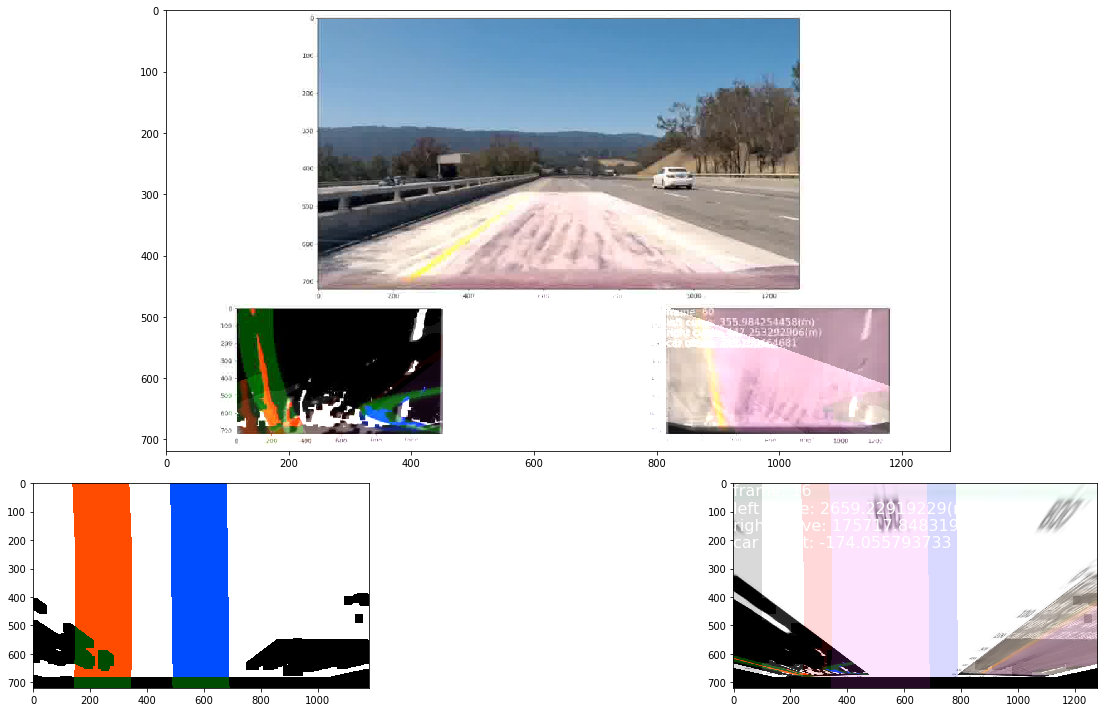

videoFrameName:  ./test_images/video/video_frames/drivingFrame0018.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  17 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([816578,  33022])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847936,   1664])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([839490,  10110])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 97285, 752315])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849567,     33])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849567,     33])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([195819, 653781])) , shape: (720, 1180)
enhanceLaneMarkers-combined

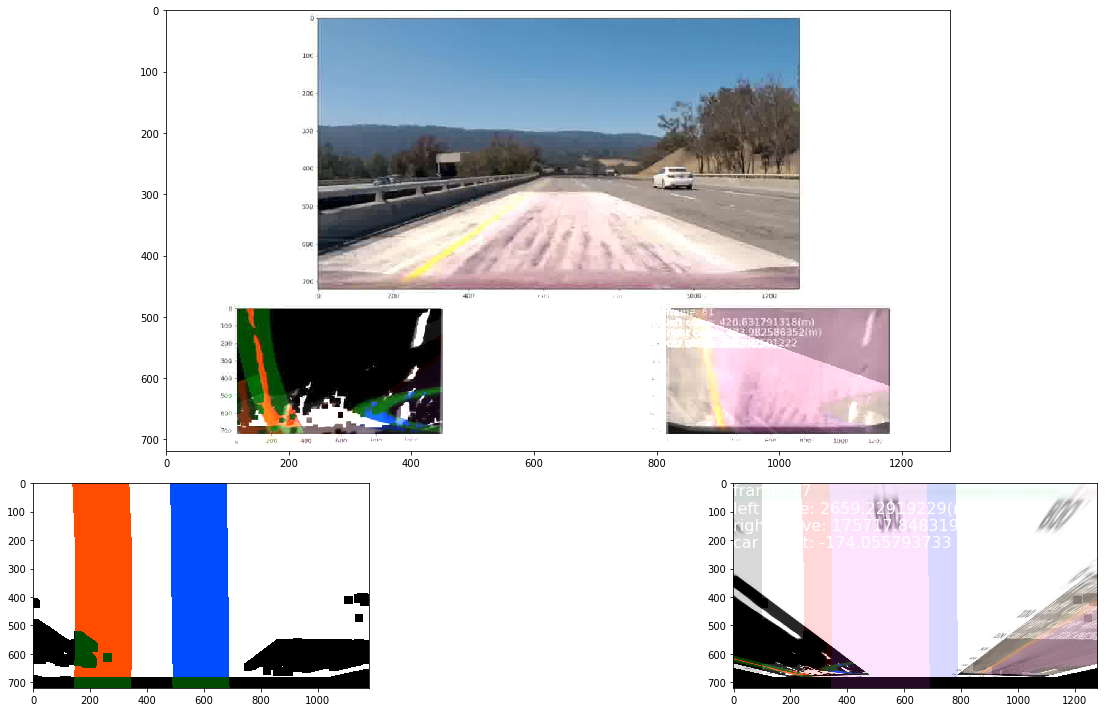

videoFrameName:  ./test_images/video/video_frames/drivingFrame0019.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  18 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([816459,  33141])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848679,    921])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([840245,   9355])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 96587, 753013])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849576,     24])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849576,     24])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([195294, 654306])) , shape: (720, 1180)
enhanceLaneMarkers-combined

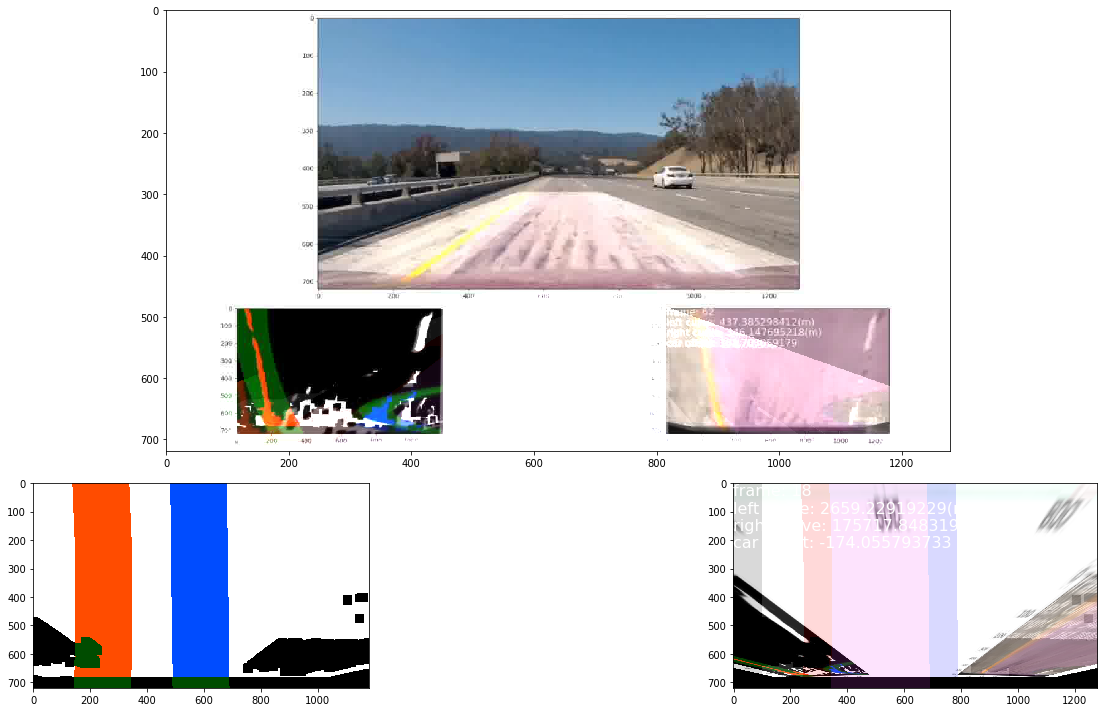

videoFrameName:  ./test_images/video/video_frames/drivingFrame0020.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  19 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([821050,  28550])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848398,   1202])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([840052,   9548])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([ 99247, 750353])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849554,     46])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849554,     46])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([197976, 651624])) , shape: (720, 1180)
enhanceLaneMarkers-combined

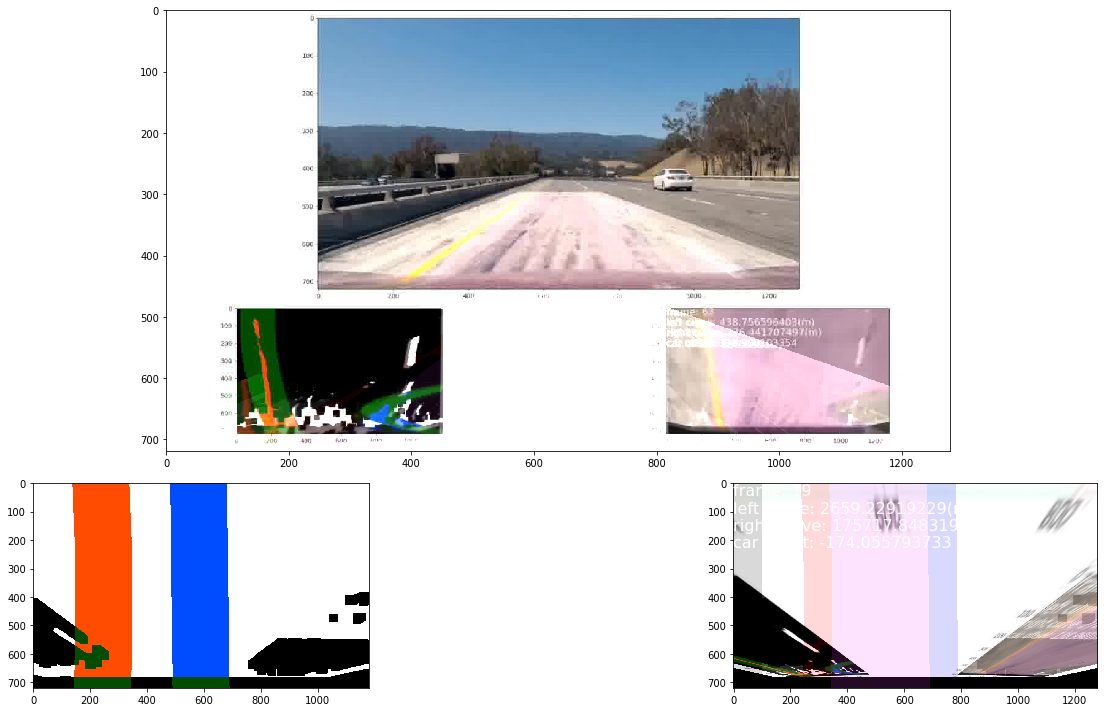

videoFrameName:  ./test_images/video/video_frames/drivingFrame0021.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  20 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818629,  30971])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([848278,   1322])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([839251,  10349])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([100790, 748810])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849566,     34])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849566,     34])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199719, 649881])) , shape: (720, 1180)
enhanceLaneMarkers-combined

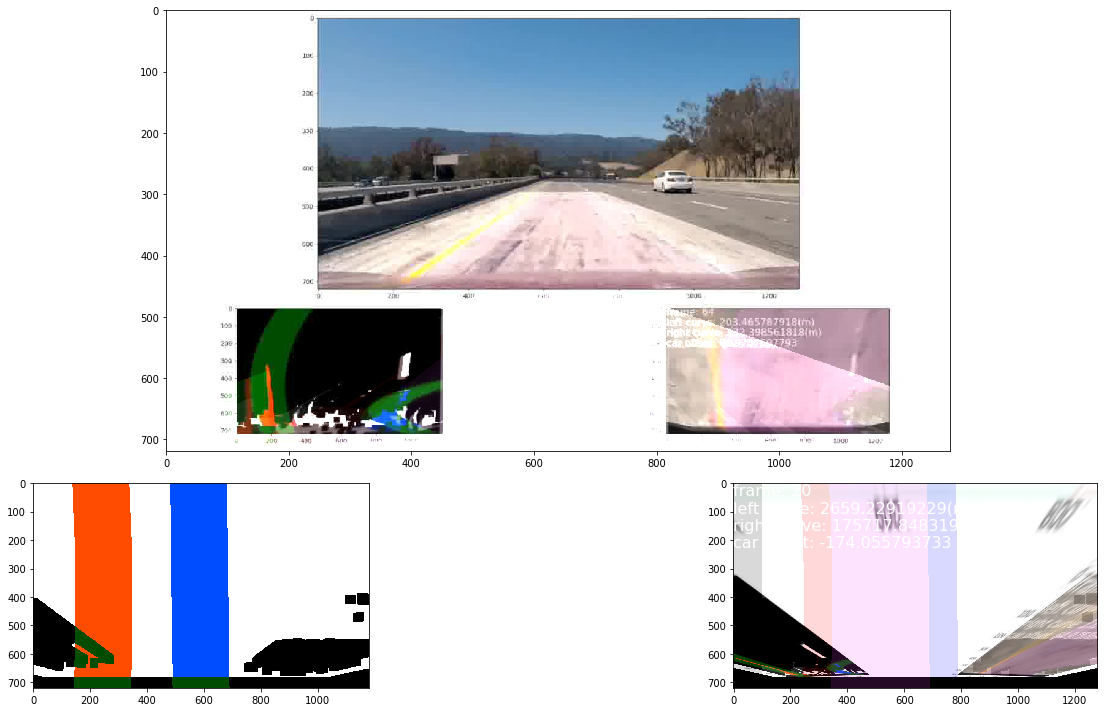

videoFrameName:  ./test_images/video/video_frames/drivingFrame0022.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  21 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([819812,  29788])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847242,   2358])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([839463,  10137])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([101124, 748476])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849573,     27])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849573,     27])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199096, 650504])) , shape: (720, 1180)
enhanceLaneMarkers-combined

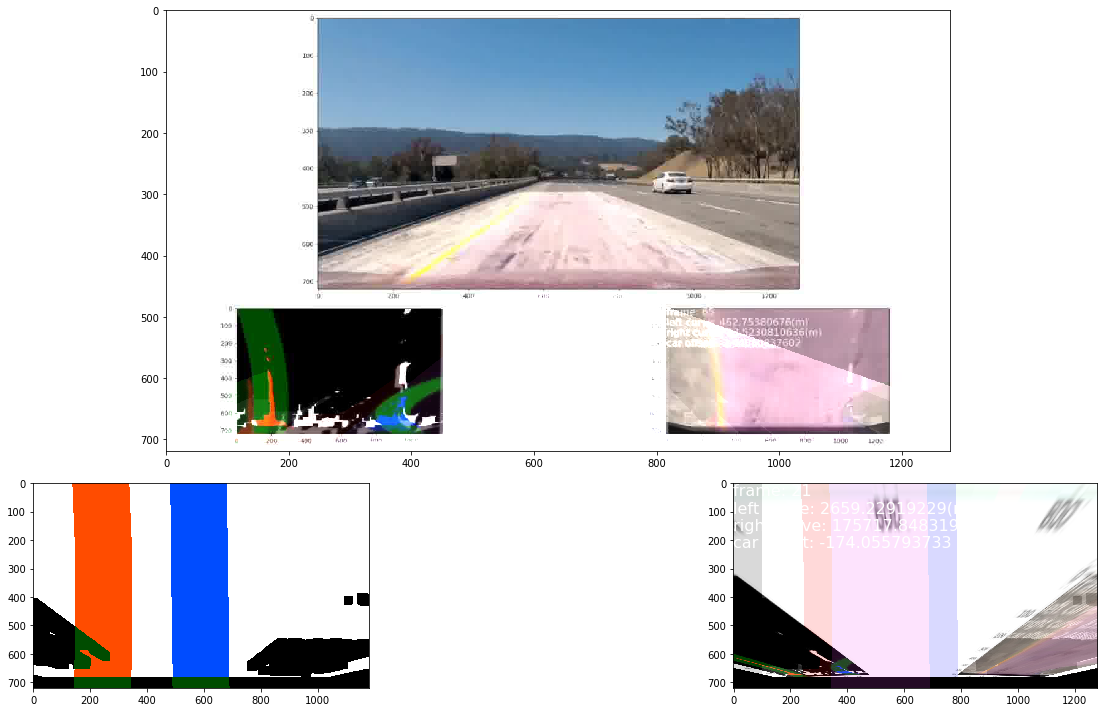

videoFrameName:  ./test_images/video/video_frames/drivingFrame0023.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  22 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818396,  31204])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847441,   2159])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([827080,  22520])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([101487, 748113])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849565,     35])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849565,     35])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([199800, 649800])) , shape: (720, 1180)
enhanceLaneMarkers-combined

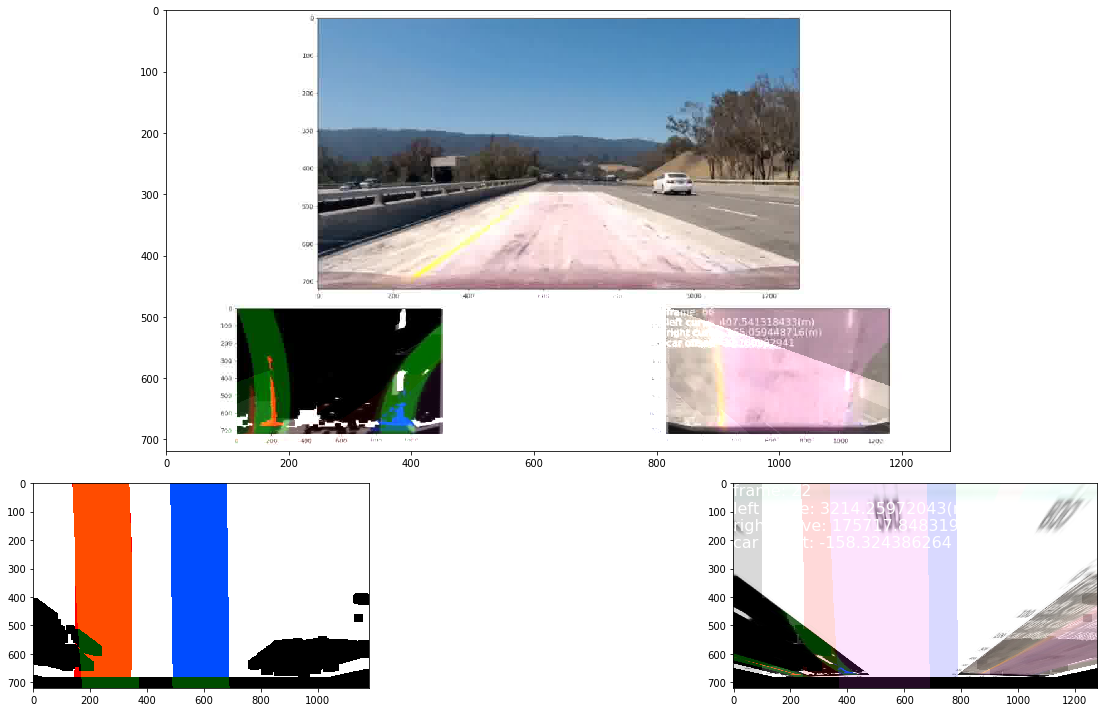

videoFrameName:  ./test_images/video/video_frames/drivingFrame0024.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  23 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([818627,  30973])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([847668,   1932])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([826905,  22695])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([101749, 747851])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849571,     29])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849571,     29])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([200207, 649393])) , shape: (720, 1180)
enhanceLaneMarkers-combined

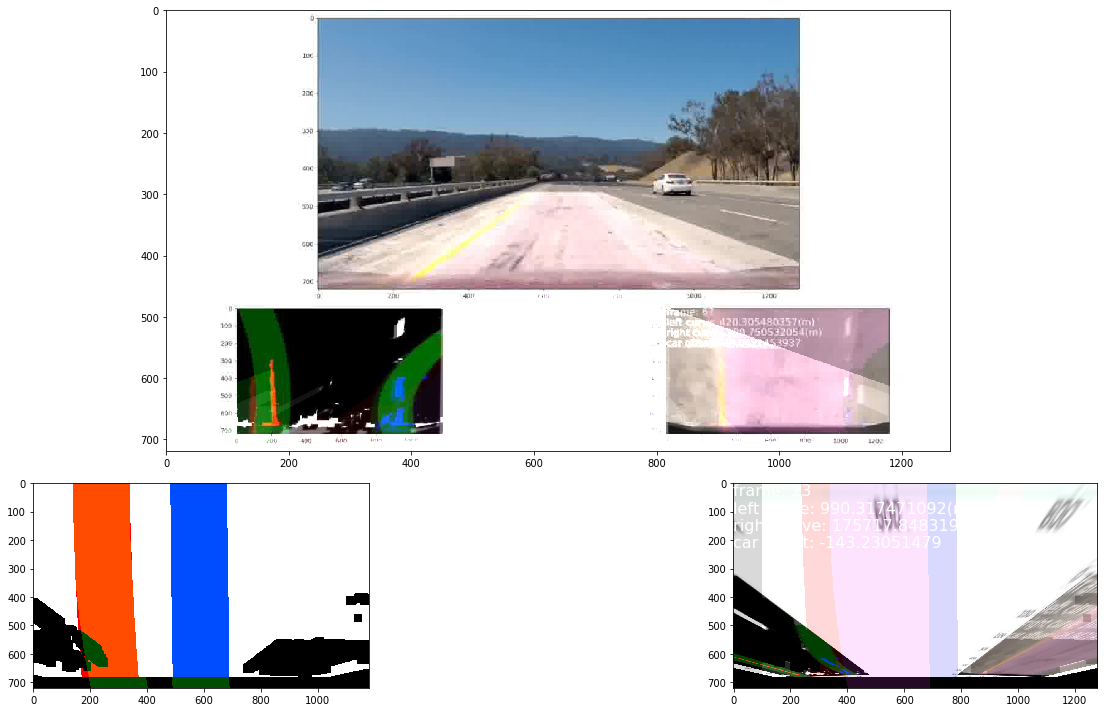

videoFrameName:  ./test_images/video/video_frames/drivingFrame0025.jpg , videoFrame.shape: (720, 1280, 3) , type: uint8
processVideoFrame-frameNumber:  24 , videoFrame.shape: (720, 1280, 3) , type: uint8
enhanceLaneMarkers-sobelImage-counts: (array([0, 1], dtype=uint8), array([817863,  31737])) , shape: (720, 1180)
channelYellow-hChannel counts: (array([0, 1], dtype=uint8), array([846516,   3084])) , shape: (720, 1180)
channelYellow-sChannel counts: (array([0, 1], dtype=uint8), array([829671,  19929])) , shape: (720, 1180)
channelYellow-vChannel counts: (array([0, 1], dtype=uint8), array([101585, 748015])) , shape: (720, 1180)
channelYellow-channelBinary counts: (array([0, 1], dtype=uint8), array([849569,     31])) , shape: (720, 1180)
enhanceLaneMarkers-yellowImage-counts: (array([0, 1], dtype=uint8), array([849569,     31])) , shape: (720, 1180)
enhanceLaneMarkers-whiteImage-counts: (array([0, 1], dtype=uint8), array([198968, 650632])) , shape: (720, 1180)
enhanceLaneMarkers-combined

KeyboardInterrupt: 

In [3]:
import glob
import numpy as np
import cv2

import matplotlib.image as mpimage
import matplotlib.pyplot as plt

import EnhanceLaneMarkers
import PerspectiveTransform
import ProcessImage
import AnnotateImage
import ProcessVideoFrame

# ploty is used as a flag for the 1st pass
ploty = None #  y/row values, one for ever integer y
left_fit = None # x = left_fit[0] y**2 + left_fit[1] y + left_fit[2]
right_fit = None
#visualizationImage = None

videoImages=glob.glob("./test_images/video/video_frames/driving*")
videoImages.sort()
#videoImages= [
#    './test_images/video_frames/frame0001.jpg',
#    './test_images/video_frames/frame0002.jpg',
#    './test_images/video_frames/frame0003.jpg',
#    './test_images/video_frames/frame0004.jpg',
#    './test_images/video_frames/frame0005.jpg',
#    './test_images/video_frames/frame0006.jpg',
#    './test_images/video_frames/frame0007.jpg',
#    './test_images/video_frames/frame0008.jpg',
#    './test_images/video_frames/frame0009.jpg',
#    './test_images/video_frames/frame0010.jpg'
#]
print("videoImages:", videoImages)

%matplotlib inline
VIDEOIMAGECOLUMNCOUNT=3
totalImageRows=len(videoImages)
#showVideoFrames = plt.figure(figsize = (VIDEOIMAGECOLUMNCOUNT*10,totalImageRows*8))
showVideoFrames = plt.figure(figsize=(20,10))


for videoFrameName, videoFrameIndex in zip(videoImages, range(0, totalImageRows)):
    videoFrame=mpimage.imread(videoFrameName)
    print("videoFrameName: ",videoFrameName, ", videoFrame.shape:", videoFrame.shape, ", type:", videoFrame.dtype)
    [left_fit,right_fit], figure=ProcessVideoFrame.processVideoFrame(videoFrame, videoFrameIndex, left_fit, right_fit)
    plt.show()
    plt.close(figure)
